# Phylogenetic generalized least squares regression example

Load phylogenies: (1) The Angiosperm Phylogeny Group has family-level resolution; therefore, each family is a polytomy. (2) The Zanne phylogeny has species-level resolution, but does not have all species.

In [2]:
setwd("../../Raw_data")
tryCatch(    # Load caper package.
    library(caper),
    error = install.packages("caper", repos = "http://cran.utstat.utoronto.ca/")
)
apg.tree = read.tree("APG_phylo/Webb_ages_pruned_unrooted.nwk")
apg.tree = makeLabel(apg.tree) # Fix duplicate node names (because some are blank) error for comparative.data()
z.tree = read.tree("Zanne_phylo/Zanne_pruned.nwk")
z.tree = makeLabel(z.tree)

Loading required package: ape
Loading required package: MASS
Loading required package: mvtnorm


Load and compile relevant datasets: specific leaf area (SLA); (2) relative leaf water content (RWC); (3) leaf chlorophyll content (CC); (4) flow cytometry data on genome size and leaf endopolyploidy; and (5) growth form (GF).

In [ ]:
SLA_RWC = read.csv("SLA_RWC.csv") # Data to calculate specific
CC = read.csv("CC.csv")
Flow_cytometry = read.csv("Flow_cytometry.csv")
GF = read.csv("GF.csv")
GF = GF[, 1:5]
names(GF) = c("Group.1", "Dur1", "Dur2", "Gh1", "Gh2")

AreaMass$SLA = AreaMass$LeafArea/(10000*AreaMass$DriedMass) # Standardize to metres squared per gram
AreaMass$VcVw = (AreaMass$FreshMass - AreaMass$DriedMass)/AreaMass$DriedMass
# EI across FL2 and FL3
DNA$EI = rowMeans(cbind(DNA$EI.FL2, DNA$EI.FL3), na.rm=TRUE)
# MeanC across FL2 and FL3
DNA$MeanC = rowMeans(cbind(DNA$MeanC.FL2, DNA$MeanC.FL3), na.rm=TRUE)

sp.data = read.csv("species_data.csv")
sp.data$Group.1 = tolower(sp.data$Group.1)
apg.data = comparative.data(phy=apg.tree, data=sp.data, names.col="Group.1", vcv=TRUE)


Call:
pgls(formula = log(SLA) ~ CC, data = apg.data, lambda = "ML")

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059838 -0.019258  0.001684  0.016846  0.082016 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [ ML]  : 0.708
   lower bound : 0.000, p = 5.5286e-10
   upper bound : 1.000, p = < 2.22e-16
   95.0% CI   : (0.500, 0.838)
delta  [Fix]  : 1.000

Coefficients:
              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) -2.1763941  0.2116678 -10.2821 < 2.2e-16 ***
CC          -0.0382411  0.0044799  -8.5362  9.77e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02735 on 161 degrees of freedom
Multiple R-squared: 0.3116,	Adjusted R-squared: 0.3073 
F-statistic: 72.87 on 1 and 161 DF,  p-value: 9.836e-15 

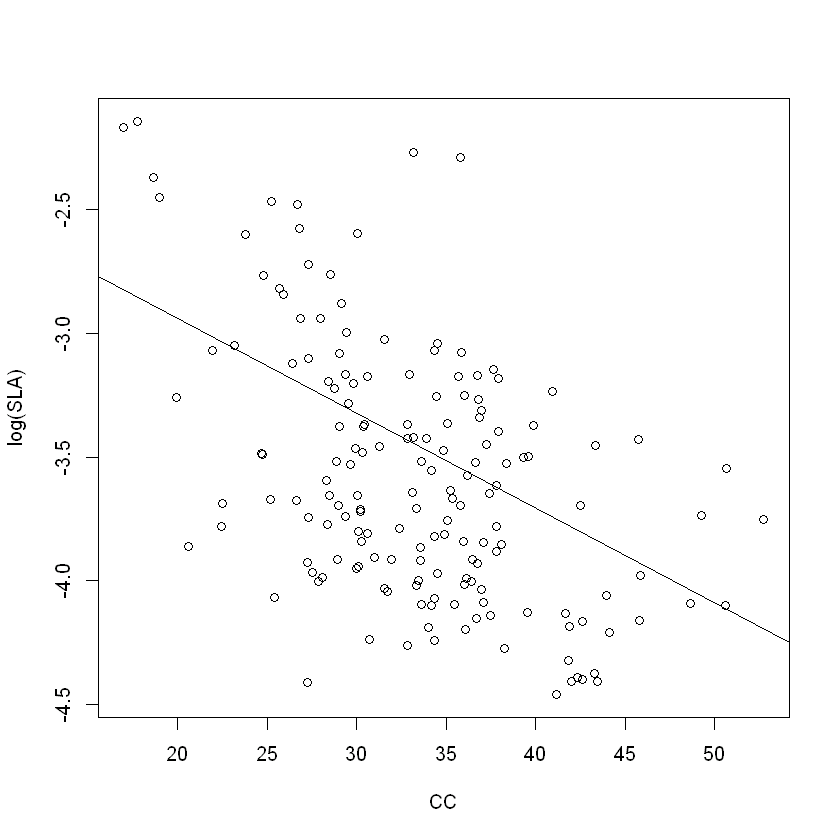

In [3]:
plot(log(SLA) ~ CC, data=sp.data)
model = pgls(log(SLA) ~ CC, apg.data, lambda='ML')
summary(model)
abline(model$model$coef[1], model$model$coef[2])

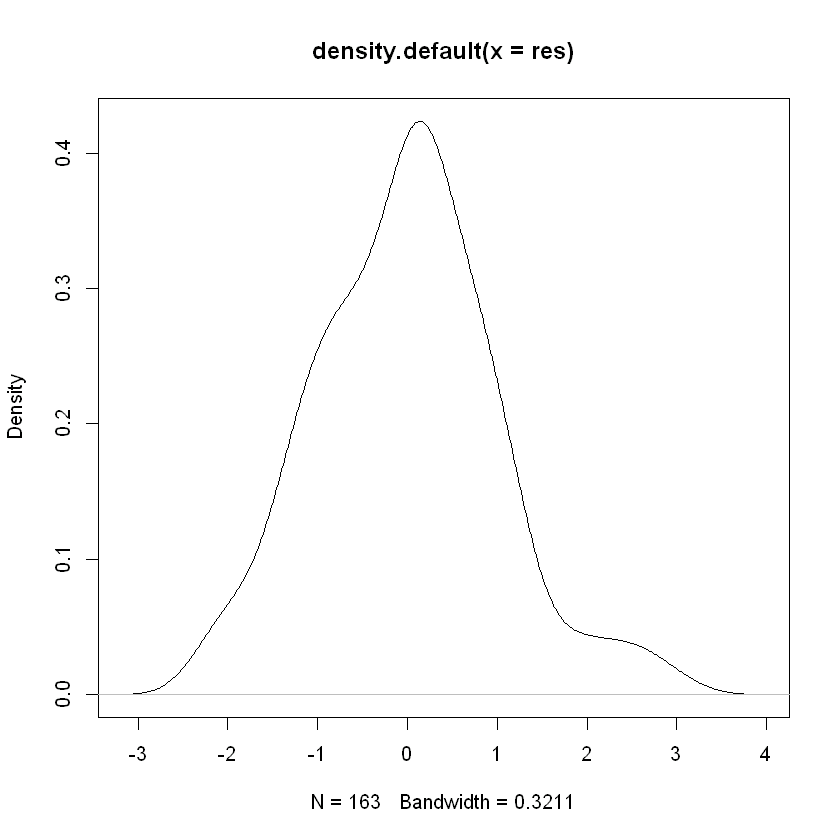

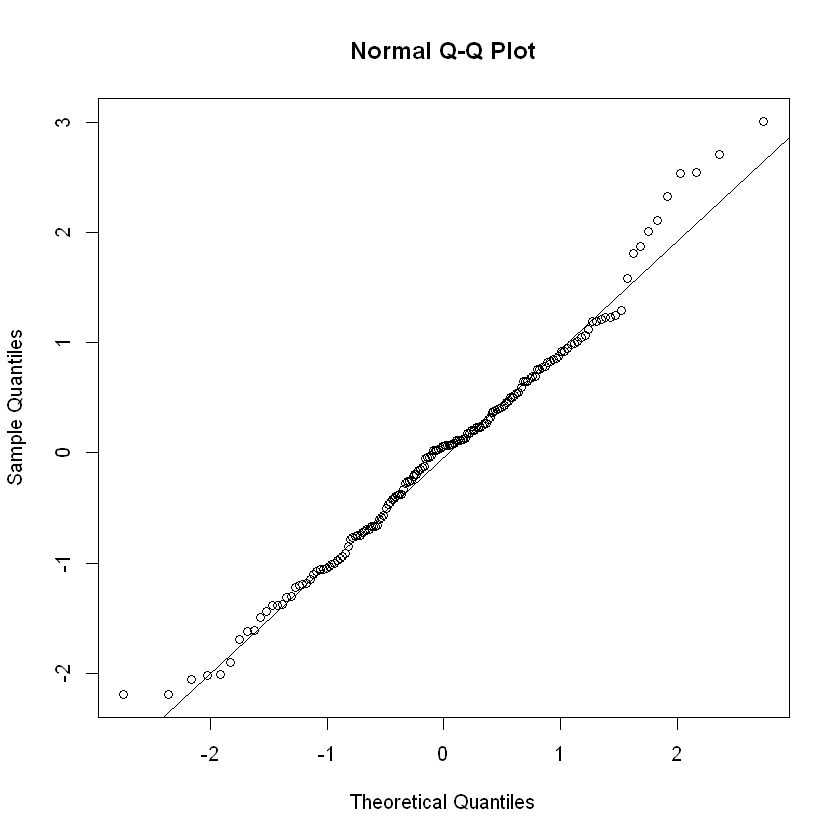

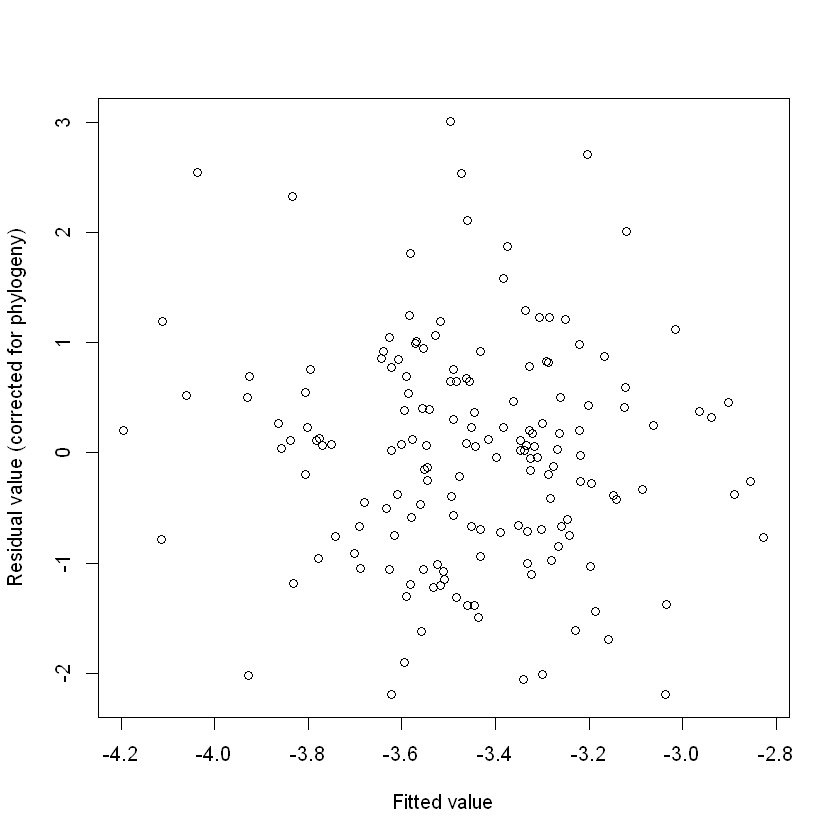

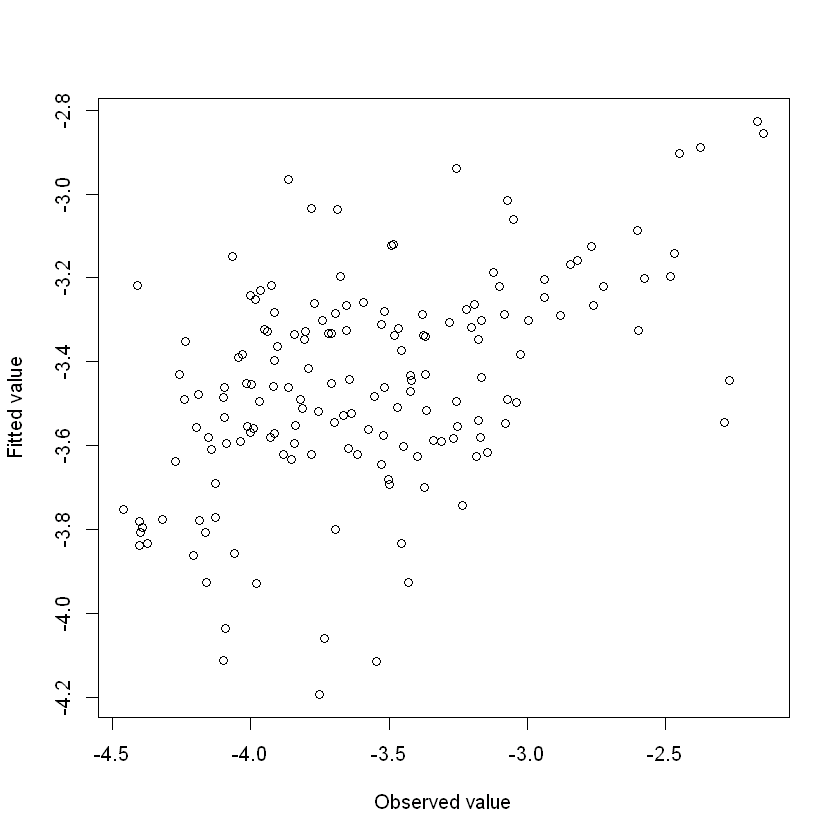

In [4]:
plot(model)